## Write your headlines first
## practice your two line pitch
## then write subheaders & sketch out story

## List of databases I'm working with:

#### megis_one : #from here: http://www.maine.gov/megis/catalog/ downloaded shapefile
...after speaking to someone at MCHT realized that it was missing info.

Contacted Bob Bistrais at MEGIS bob.bistrais@maine.gov who sent over the new, unpublished file,
which I called 

#### megis_two







In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pysal as ps
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
driver = webdriver.Chrome()

%matplotlib inline

## MEGIS  
(#from here: http://www.maine.gov/megis/catalog/) has a shapefile of Conserved Lands in Maine. Let's look at it.


Data Dictionary info that's relevant:


    ACQ_YEAR: acquisition year
    CALC_AC : calculated acreage
    DESIGNATIO : designation (easement, sanctuary, etc.)
    HOLD1_NAME : manager
    HOLD1_TYPE : state/private
    PARCEL_NAM : name of the preserve/parcel/easement
    geometry : polygon = shape of holding
 

In [11]:
#from here: http://www.maine.gov/megis/catalog/
megis_one = gpd.read_file('/Users/kaitlincough/Documents/data_studio/big_files_that_make_github_sad/shapefiles/conserved_landss/conserved_lands.shp')

In [12]:
pd.set_option("display.max_columns", 100)
megis_one.head(100)

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
0,None,,,26.857197,787,,,,,,,,None,,,,,,,,,,,,Contact landowner for additional information,,,,0.000,"POLYGON ((463512.4724000003 5027491.558599999,..."
1,None,1965,,8.314696,1,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,2,The Nature Conservancy,Private,,,,,,MEFO File Survey; CAP,,La Verna Preserve,"Allowed for general uses, contact owner for de...",Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((462543.8321000002 4861397.2675, 4625..."
2,None,,,52.293330,2,Fee,,,,,,,None,4,Maine Department of Transportation,State,,,,,,Roadside Rest Area,ASH HILL,ASH HILL SCENIC AREA,Contact landowner for additional information,,,,52.292,"POLYGON ((542053.9376999997 5089059.000499999,..."
3,1993-12-27,1993,,247.049757,3,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,1,The Nature Conservancy,Private,,,,,,MEFO File Survey,,Saco Heath Preserve,Contact landowner for additional information,Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((381291.2644999996 4824393.9134, 3813..."
4,None,2001,,1.816991,4,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,1.817,"POLYGON ((492307.3439999996 5140590.4999, 4923..."
5,None,2001,,0.084249,5,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.085,"POLYGON ((531716.8749000002 5134688.4998, 5317..."
6,1989-09-06,1989,,30.675615,6,Easement,,,Conservation Easement,,Chris Cabot,"put-copies selected features, coordinate infor...",2009-07-16,3,Maine Department of Inland Fisheries and Wildlife,State,,,0013001,,,Digitized boundaries from georeferenced 1973 s...,McBurnie Property,Conant Brook,Contact landowner for additional information,,,,37.000,"POLYGON ((583480.4373000003 5176787.9998, 5834..."
7,None,2001,,0.025927,7,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.027,"POLYGON ((479938.0630000001 5139478.500600001,..."
8,None,2001,,0.063186,8,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.065,"POLYGON ((480570.1564999996 5138042.000600001,..."
9,None,2001,,0.535307,9,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.535,"POLYGON ((480686.8128000004 5139087.500299999,..."


In [35]:
megis_one['HOLD1_NAME'].value_counts().head(10)

Maine Minor Civil Division                           2008
Maine Bureau of Parks and Lands                      1446
Maine Department of Inland Fisheries and Wildlife    1411
US Fish and Wildlife Service                         1270
Maine Coast Heritage Trust                            496
US National Park Service                              400
The Nature Conservancy                                312
                                                      252
Maine Farmland Trust                                  207
New England Forestry Foundation, Inc.                 180
Name: HOLD1_NAME, dtype: int64

In [41]:
megis_one[megis_one['HOLD1_NAME'] == 'Maine Coast Heritage Trust']

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
85,None,,63-107,0.174652,85,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Verified by SubmergedLands-BPL-DKW. Updated at...,,,Contact landowner for additional information,,,Y,0.175,"POLYGON ((510497.5313999997 4880559.5001, 5105..."
2498,None,,59-657,0.064843,2511,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-10-04,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,,Unnamed Island,Contact landowner for additional information,,,Y,0.065,"POLYGON ((516810.4687999999 4907811.5002, 5168..."
2499,None,,63-084,0.190661,2512,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,Part of Big Smith Island,Big Smith Island,Contact landowner for additional information,,,Y,0.191,"POLYGON ((515461.1870999997 4882321.0001, 5154..."
2500,None,,63-099,0.290270,2513,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,,,Contact landowner for additional information,,,Y,0.290,"POLYGON ((515202.3750999998 4881139.4999, 5152..."
3240,None,,,0.758037,3281,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-02-04,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Little Gaffert LLC CE,Contact landowner for additional information,,,,0.000,"POLYGON ((518347.8441000003 4913865.431399999,..."
3241,None,,,1.669131,3282,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-02-04,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Little Gaffert LLC CE,Contact landowner for additional information,,,,0.000,"POLYGON ((518345.1366999997 4914073.903200001,..."
3242,None,,,3.031869,3283,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Wood Island,Contact landowner for additional information,,,,0.000,"POLYGON ((521368.1875 4919661, 521363.40629999..."
3243,None,,,2.862561,3284,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Hermit Island,Contact landowner for additional information,,,,0.000,"POLYGON ((521197.1875 4919417.5, 521186.218799..."
3246,None,,,7.167018,3287,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,2,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Ram Island,Contact landowner for additional information,,,,0.000,"POLYGON ((515754.9687999999 4912734, 515741.75..."
3247,None,,,110.006050,3288,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,2,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Rene Henderson Nat Area,Contact landowner for additional information,,,,0.000,"POLYGON ((516204.6999000004 4917970.7787, 5150..."


In [27]:
megis_one['HOLD1_TYPE'].value_counts()

Private      3673
State        3088
Municipal    2021
Federal      1772
Other         249
               28
Name: HOLD1_TYPE, dtype: int64

In [21]:
megis_grouped = megis_one.groupby('HOLD1_TYPE')['CALC_AC'].sum()
type(megis_grouped)


pandas.core.series.Series

In [22]:
megis_grouped_df = megis_grouped.to_frame()
megis_grouped_df.head()

,CALC_AC
HOLD1_TYPE,
,5.091229e+03
Federal,2.027507e+05
Municipal,4.022447e+04
Other,1.470937e+04
Private,2.382877e+06


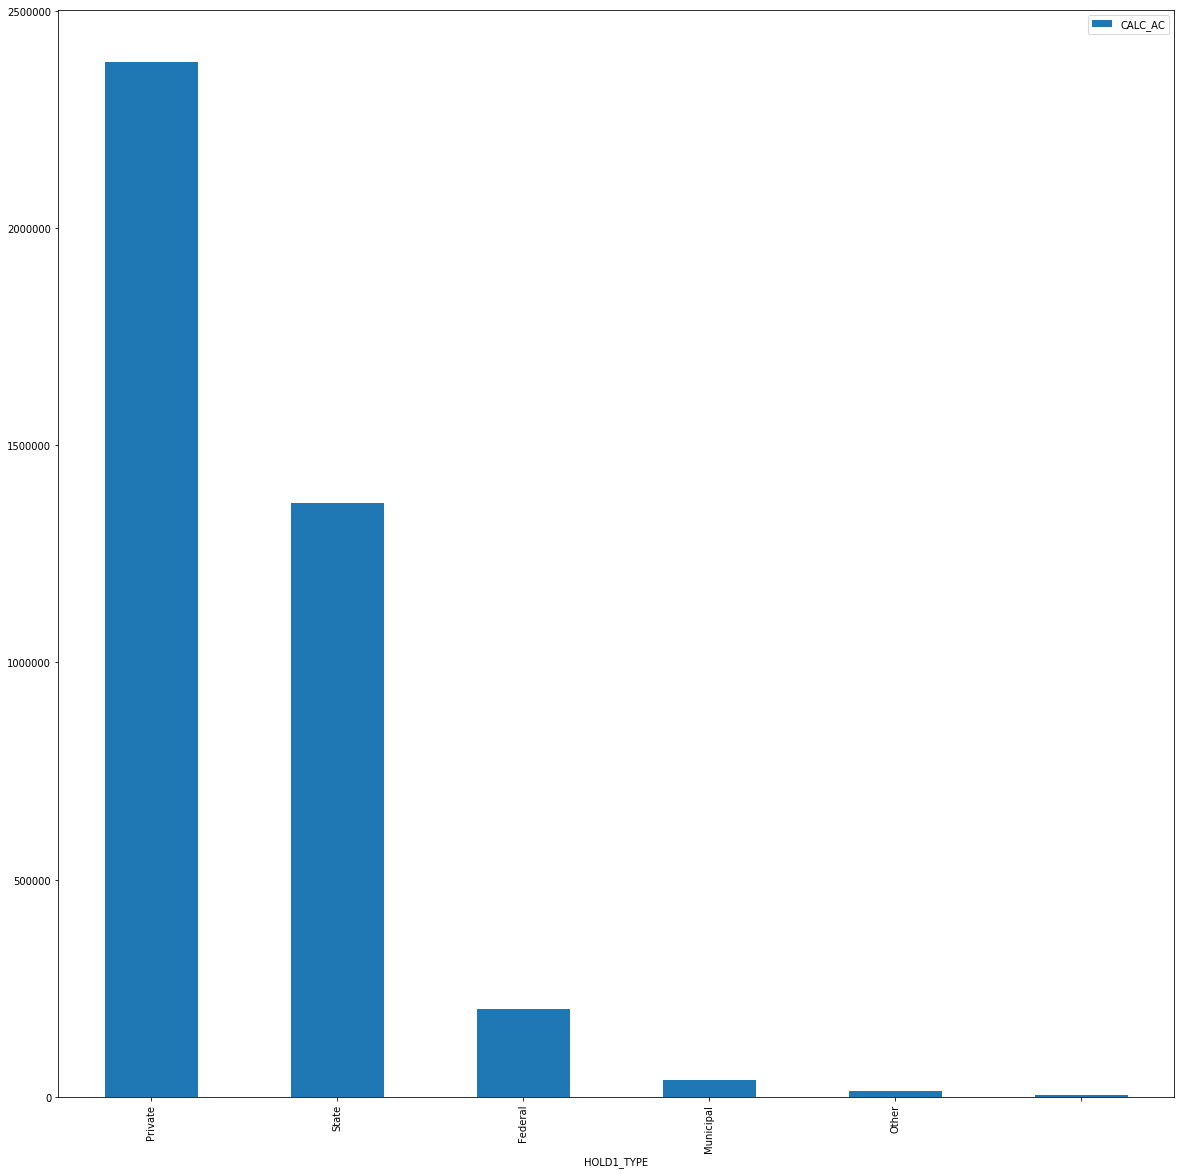

In [26]:
megis_grouped_df.sort_values(by='CALC_AC', ascending=False).plot(kind='bar', figsize=(20,20))
plt.savefig('megis_grouped_bar.pdf')

In [13]:
# megis_one[megis_one['HOLD1_TYPE'].str.contains('Other')]

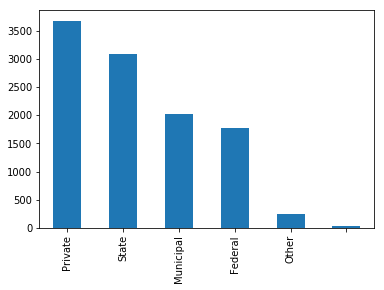

In [9]:
megis_one['HOLD1_TYPE'].value_counts().plot(kind='bar', stacked=True)

In [11]:
# conservation_trusts.shape()

In [12]:
#what're the columns?
megis_one.columns

Index(['ACQ_DATE', 'ACQ_YEAR', 'BPL_ID', 'CALC_AC', 'CL_UNIQUEI', 'CONS1_TYPE',
       'CONS2_TYPE', 'DEPT_ID', 'DESIGNATIO', 'ECO_RESERV', 'EDITOR',
       'FMPROCSS', 'FMUPDDAT', 'GAP_STATUS', 'HOLD1_NAME', 'HOLD1_TYPE',
       'HOLD2_NAME', 'HOLD2_TYPE', 'IFW_ID', 'IUCN_STATU', 'LMF_ID', 'NOTE_',
       'PARCEL_NAM', 'PROJECT', 'PUB_ACCESS', 'PURPOSE1', 'PURPOSE2', 'REVIEW',
       'RPT_AC', 'geometry'],
      dtype='object')

In [13]:
#what are the designations?
megis_one['DESIGNATIO'].value_counts().head()

                                  3761
Miscellaneous Municipal Lands     1568
National Wildlife Refuge          1251
State Wildlife Management Area     917
Coastal Island                     566
Name: DESIGNATIO, dtype: int64

## Why are there some missing? Contact MEGIS!

In [ ]:
#let's plot the designation types
counts = megis_one['DESIGNATIO'].value_counts().head(10)
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]

ax = counts.plot(kind='bar', fontsize=17,colors=colors, figsize=(20,20))
fig = ax.get_figure()
fig.savefig('preserve_types_bar.png')

In [15]:
# counts = megis_one['DESIGNATIO'].value_counts().head(10)
# plt.axis('equal')
# colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
# counts.plot(kind='pie', fontsize=17,colors=colors, figsize=(20,20))
# # plt.legend(labels=group_names,loc="DESIGNATIO")
# plt.show()
# plt.savefig('preserve_types.png')

# # explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4,0.6)

# # counts.plot(kind='pie', fontsize=17,colors=colors,explode=explode)


In [16]:

# ax = megis_one['DESIGNATIO'].value_counts().head(10).plot.pie(figsize=(20,10))
# ax.plot()
# ax.savefig('preserve_types_pie.pdf')

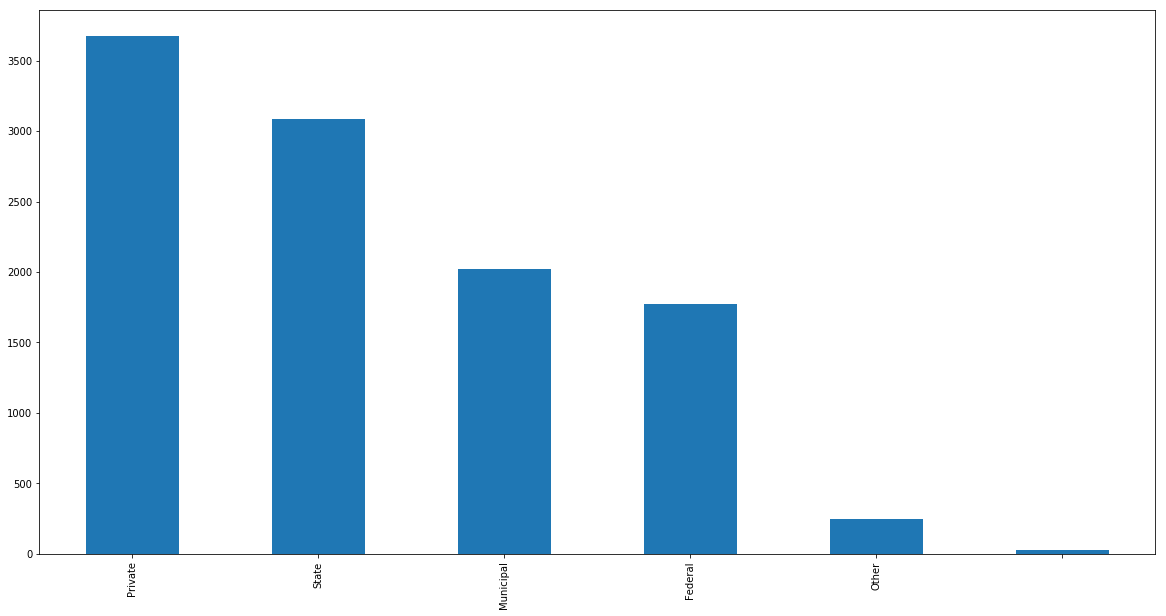

In [17]:
#are most of the holdings federal, state or private?
entity = megis_one['HOLD1_TYPE'].value_counts()
ax = entity.plot(kind='bar', figsize=(20,10))
fig = ax.get_figure()
fig.savefig('entity_bar.png')

In [18]:
megis_one['CONS1_TYPE'].value_counts()

Fee                              8297
Easement                         2212
Management Transfer Agreement     245
Public Access Easement             41
                                   20
Restricted                          8
Lease                               4
Third Party Easement                2
Other                               1
Easement Enforcer                   1
Name: CONS1_TYPE, dtype: int64

In [28]:
megis_one['HOLD1_NAME'].value_counts()

Maine Minor Civil Division                                 2008
Maine Bureau of Parks and Lands                            1446
Maine Department of Inland Fisheries and Wildlife          1411
US Fish and Wildlife Service                               1270
Maine Coast Heritage Trust                                  496
US National Park Service                                    400
The Nature Conservancy                                      312
                                                            252
Maine Farmland Trust                                        207
New England Forestry Foundation, Inc.                       180
Blue Hill Heritage Trust                                    130
Great Works Regional Land Trust                             123
Kennebunkport Conservation Trust                            121
Baxter State Park Authority                                 109
Downeast Coastal Conservancy                                 95
Forest Society of Maine                 

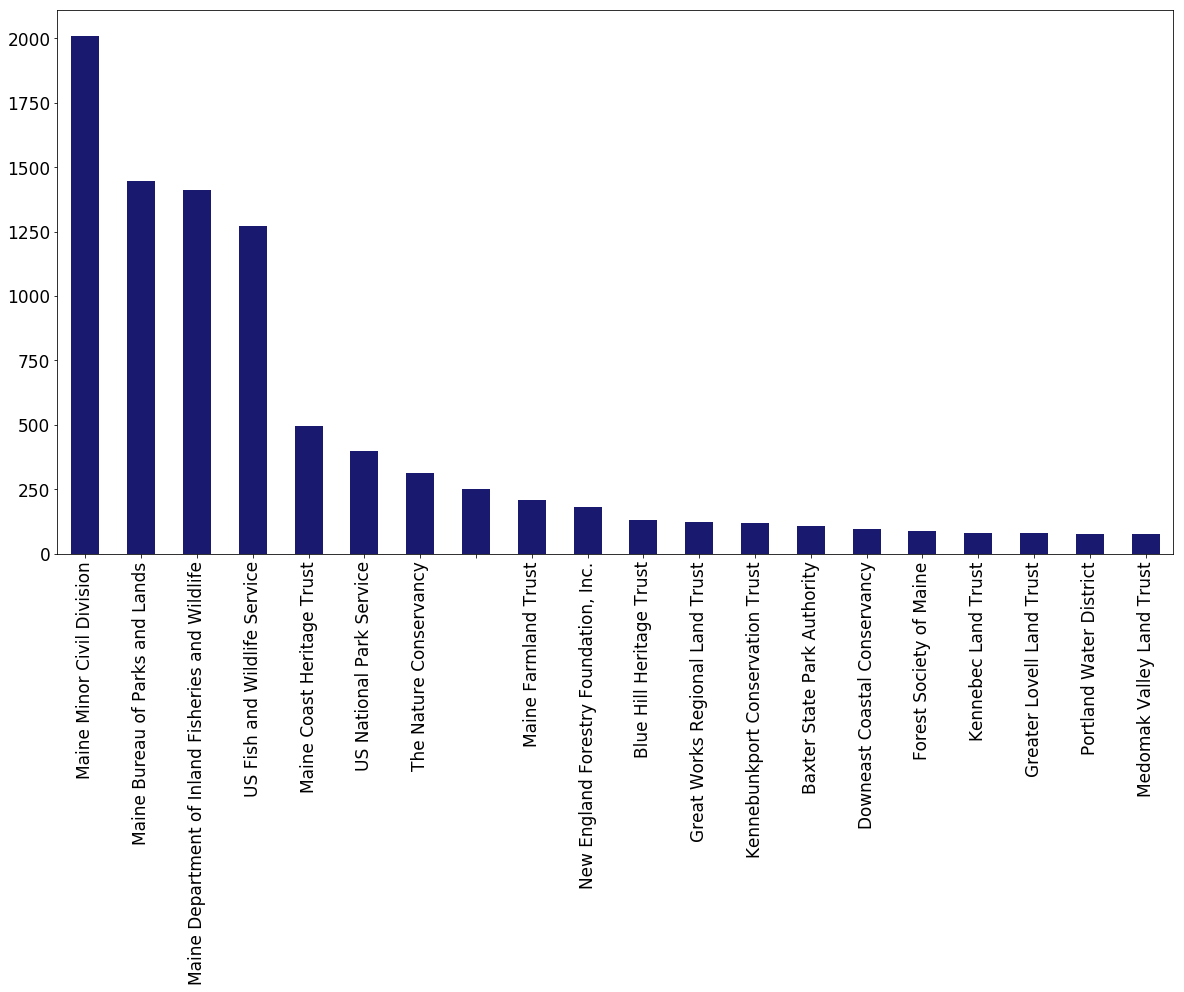

In [19]:
#which organizations manage the most parcels?
holders = megis_one['HOLD1_NAME'].value_counts().head(20)
color = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
ax = holders.plot(kind='bar', fontsize=17, color=color, figsize=(20,10))
fig = ax.get_figure()
fig.savefig('land_holder_bar.png')

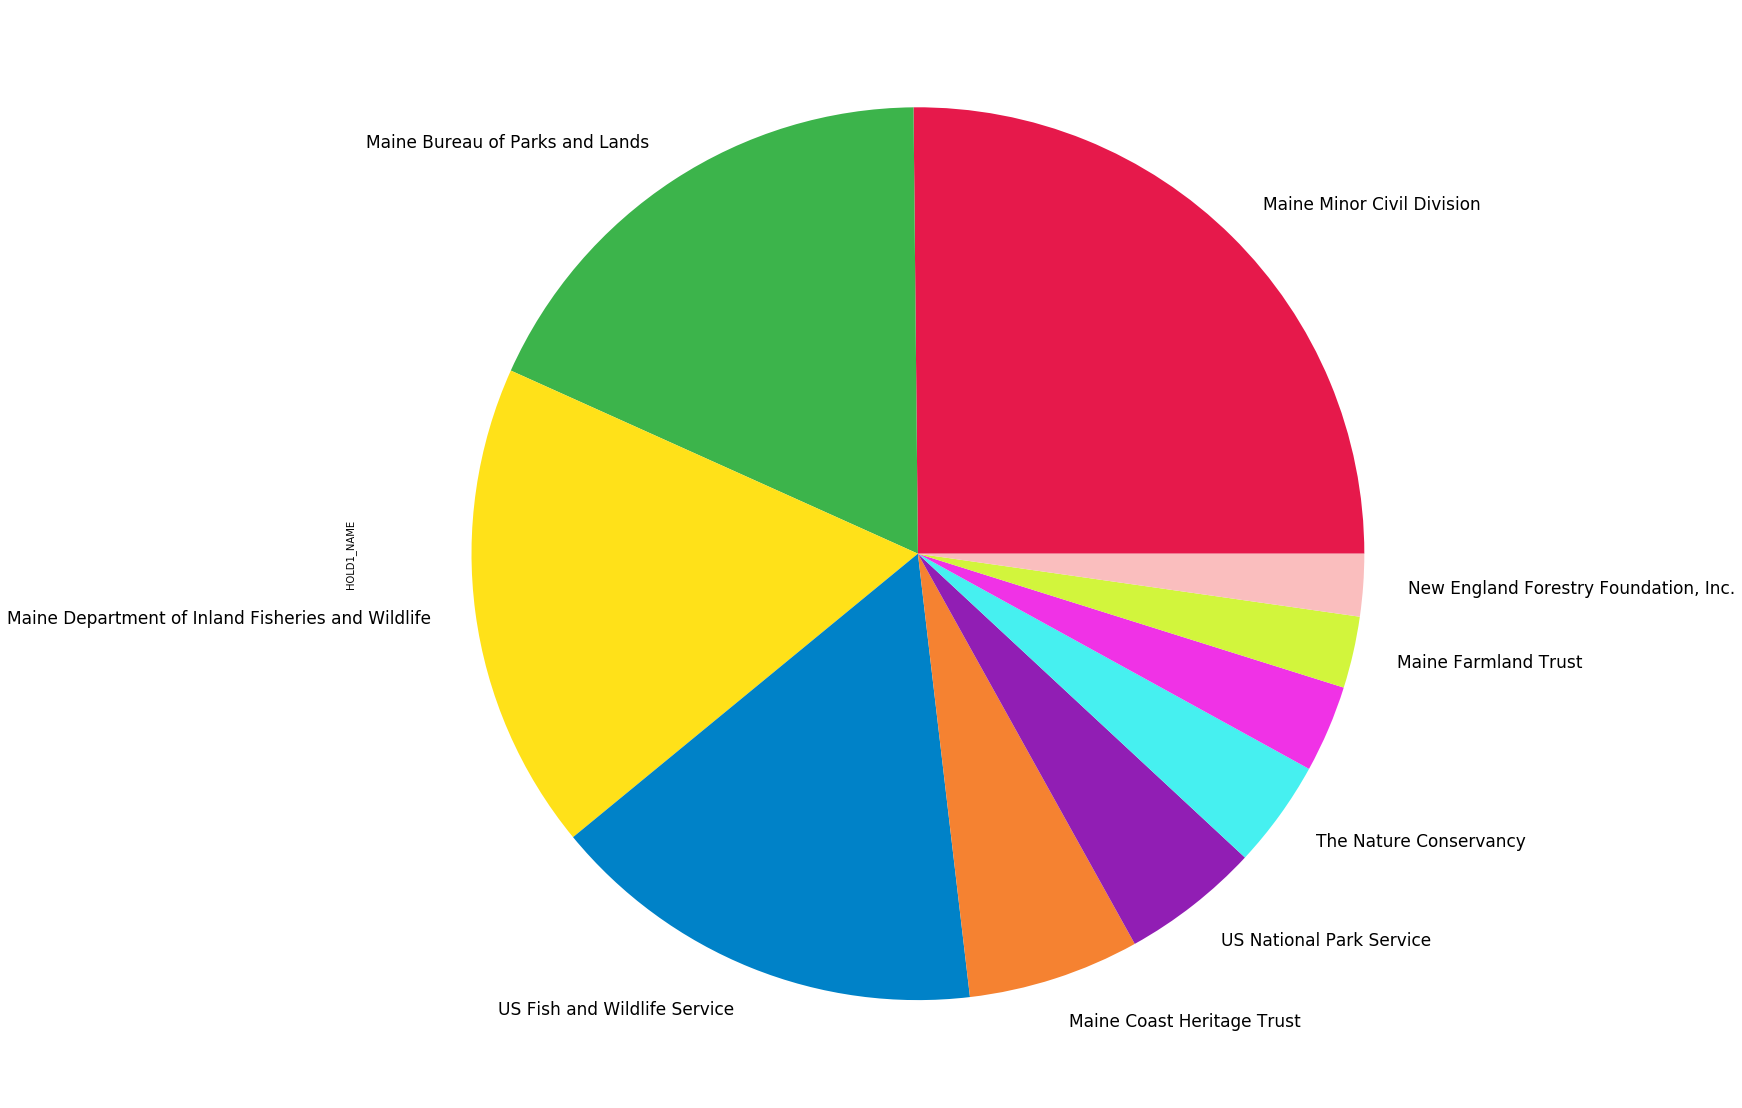

In [22]:
holders = megis_one['HOLD1_NAME'].value_counts().head(10)
plt.axis('equal')
colors = ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe',"#008080",'#e6beff','#aa6e28','#fffac8','#800000','#aaffc3','#808000','#ffd8b1','#000080','#808080','#FFFFFF','#000000']
ax = holders.plot(kind='pie', fontsize=17,colors=colors, figsize=(20,20))
# plt.legend(labels=group_names,loc="DESIGNATIO")
fig = ax.get_figure()
fig.savefig('land_holder_pie2.png')


KeyboardInterrupt: 

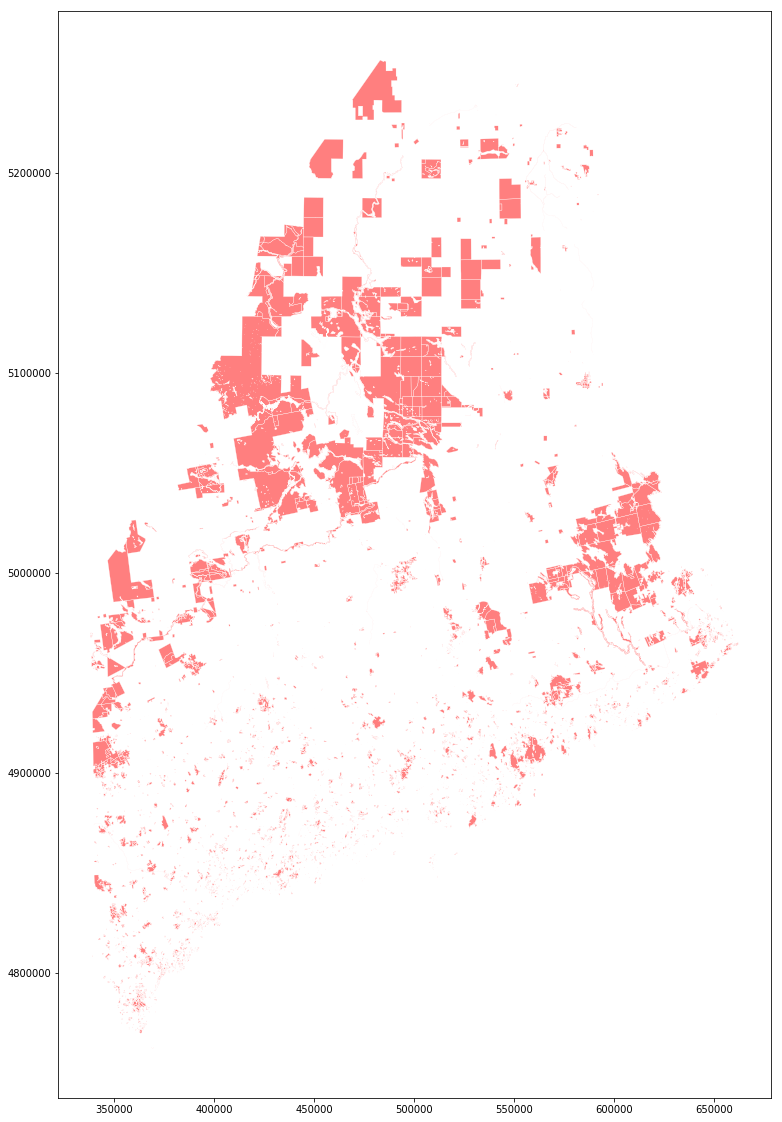

In [21]:
#let's map all of them using the shapefile
ax = megis_one.plot(color='red', linewidth=0.25, edgecolor='white', figsize=(20,20))
ax.plot()
ax.savefig('megis_one.png')



### After scraping info from MLTN (a subsidiary of MCHT), I cleaned the file in excel and then reuploaded it below. see maine_conservation_scraping notebook for info

In [ ]:
#I cleaned the file a little in excel
#because I find that easier sometimes
#so let's re-import it

mltn_scraped = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/maine_conservation_lands/maine_land_trust_info.csv')
mltn_scraped.head(50)

In [ ]:
#make sure it's still the same leng
len(mltn_scraped)

In [ ]:
#so the next step is to join the geodataframe megis_one with the df with all the trust info
#on the name column
#then you can create a nice map with all that info

In [ ]:
#first thing to do is reset the index on the 
#spatial dataframe so 

In [ ]:
# megis_one.rename(columns={'HOLD1_NAME': 'name'}, inplace=True)
# megis_one.head()

In [ ]:
# # continental.merge(obesity, left_on='NAME', right_on='statename')

# joined = megis_one.merge(mltn_scraped, left_on='name', right_on='name')
# joined.head(100)

In [ ]:
# joined.shape

In [ ]:
#then color it by the name of the trust

In [ ]:
# mft = joined[joined['name'] =='Maine Farmland Trust']
# mft['geometry'].plot()

In [ ]:
# mcht = joined[joined['name']=='Maine Coast Heritage Trust']
# mcht.head(496)

In [ ]:
# pd.set_option("display.max_rows", 100)
# mcht.head(500)

In [ ]:
# mcht.to_csv("mcht_only_from_joined_dataset.csv", index=False)


In [ ]:
# mcht['geometry'].plot(figsize=(20,20))

### Below is the shapefile for the actual state of Maine if we need it.

In [ ]:
# maine = gpd.read_file('/Users/kaitlincough/Documents/data_studio/data_studio_projects/shapefiles/maine_shapefile/Cnty24L.shp')

In [ ]:
# maine.head()

In [ ]:
# maine.plot()

In [ ]:
# ax = maine.plot(figsize=(25,10), color='#A9A9A9')

# mcht.plot(figsize=(25,20),ax=ax)
# ax.axis('off')
# # ax.savefig('mchtonly.png')

In [ ]:
# #plot the joined dataframe on top of the map of maine
# #coloring by the name column, ie by the trust/govt entity that controls it
# ax = maine.plot(figsize=(20,20), color='#A9A9A9')

# joined.plot(column='name', cmap='autumn_r', figsize=(20,20), ax=ax)
# ax.axis('off')
ax.savefig('maine_conservation.png')

In [ ]:
megis_one.head()

In [ ]:
megis_one.shape

In [ ]:
#here's the info from Bob Bistrais with the updated holding 
megis_two = gpd.read_file('/Users/kaitlincough/Documents/data_studio/big_files_that_make_github_sad/shapefiles/megis_conserved_lands_new/conserved_landss_new/ConservedLands.shp')

In [ ]:
megis_two.head()

In [ ]:
megis_two.shape

In [ ]:
pd.set_option("display.max_columns", 100)
megis_two.head()

In [ ]:
megis_two.columns

In [ ]:
#let's join the old MEGIS shapefile (with full names)
#with the new one, using the CL_UNIQUEI column
joined2 = megis_one.merge(megis_two, on='CL_UNIQUEI', how='outer')
joined2.head()

In [ ]:
joined2.shape

In [ ]:
megis_one.shape

In [ ]:
megis_two.shape

In [ ]:
mcht = joined2[joined2['HOLD1_NAME_x']=='Maine Coast Heritage Trust']
mcht.head(496)

In [ ]:
mcht.shape

In [ ]:
pd.set_option('display.max_rows',100)
mcht[mcht['PROJECT_x'].str.contains('sea*')==True]


In [ ]:
mcht.plot(x='ACQ_YEAR_x', y='CALC_AC_x', figsize=(20,10))